In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/drive/MyDrive/ml_work/time series/airline-passenger-traffic.csv')
data.columns = ['month','passengers']

In [3]:
data['month'] = pd.to_datetime(data['month'],format = '%Y-%m')
data = data.set_index('month')

In [4]:
data.head()

,passengers
month,
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0


In [5]:
### Time series analysis


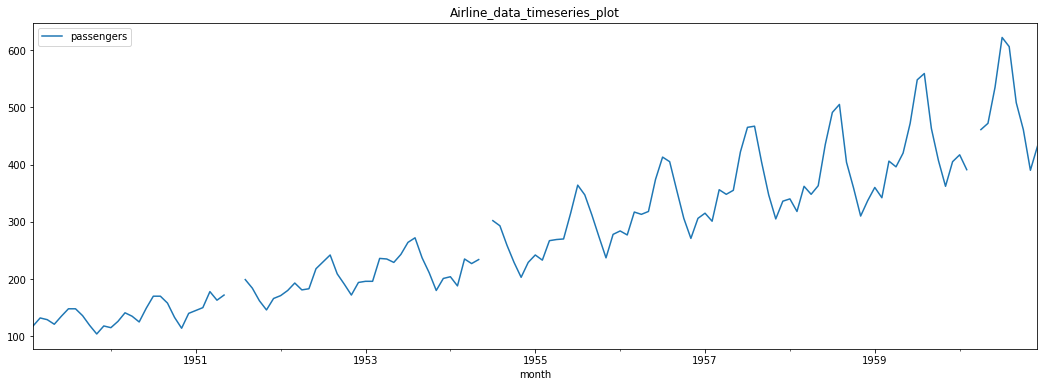

In [6]:
data.plot(figsize=(18,6))
plt.legend(loc='best')
plt.title('Airline_data_timeseries_plot')
plt.show(block=False)

Missing value treatment
Mean-imputation


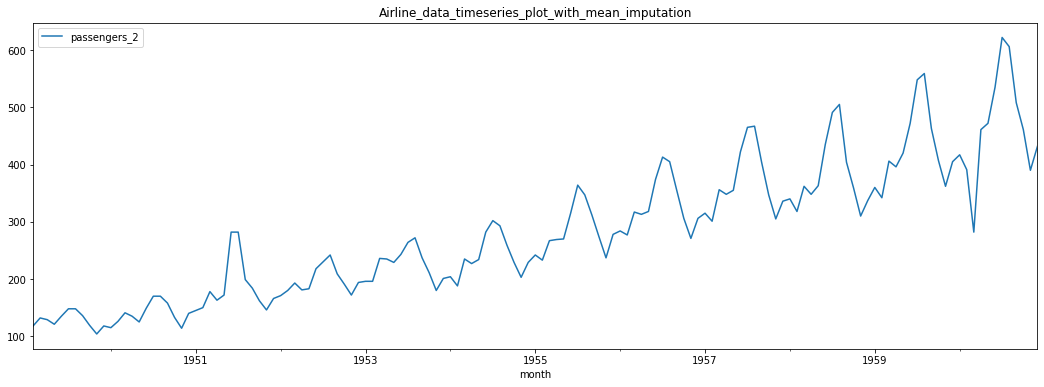

In [7]:
data = data.assign(passengers_2 = data.passengers.fillna(data.passengers.mean()))
data[('passengers_2')].plot(figsize=(18,6))
plt.legend(loc='best')
plt.title('Airline_data_timeseries_plot_with_mean_imputation')
plt.show(block=False)

In [8]:
## linear inpolation 

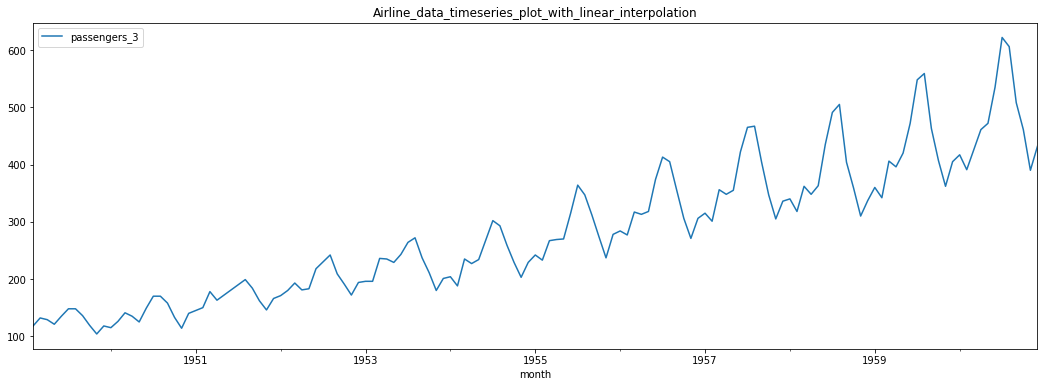

In [9]:
data = data.assign(passengers_3 = data.passengers.interpolate(method='linear'))
data[('passengers_3')].plot(figsize=(18,6))
plt.legend(loc='best')
plt.title('Airline_data_timeseries_plot_with_linear_interpolation')
plt.show(block=False)

In [10]:
data['passengers'] = data['passengers_3']

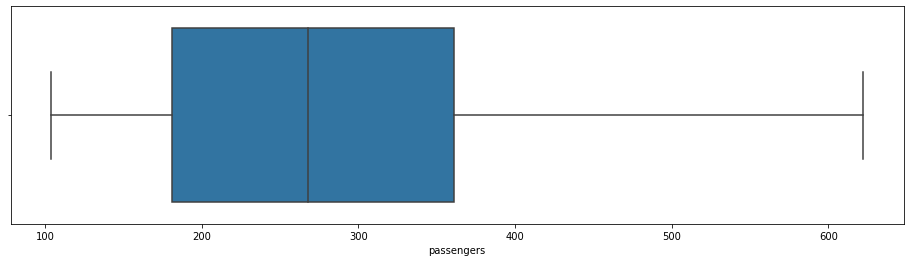

In [11]:
import seaborn as sns
fig = plt.subplots(figsize = (16,4))
ax = sns.boxplot(x = data['passengers'],whis=1.5)

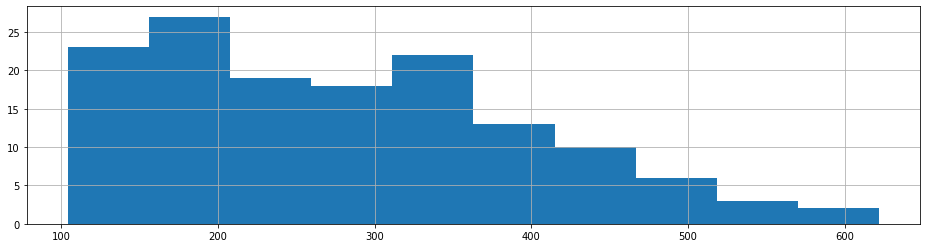

In [12]:
# histogram
fig = data.passengers.hist(figsize=(16,4))

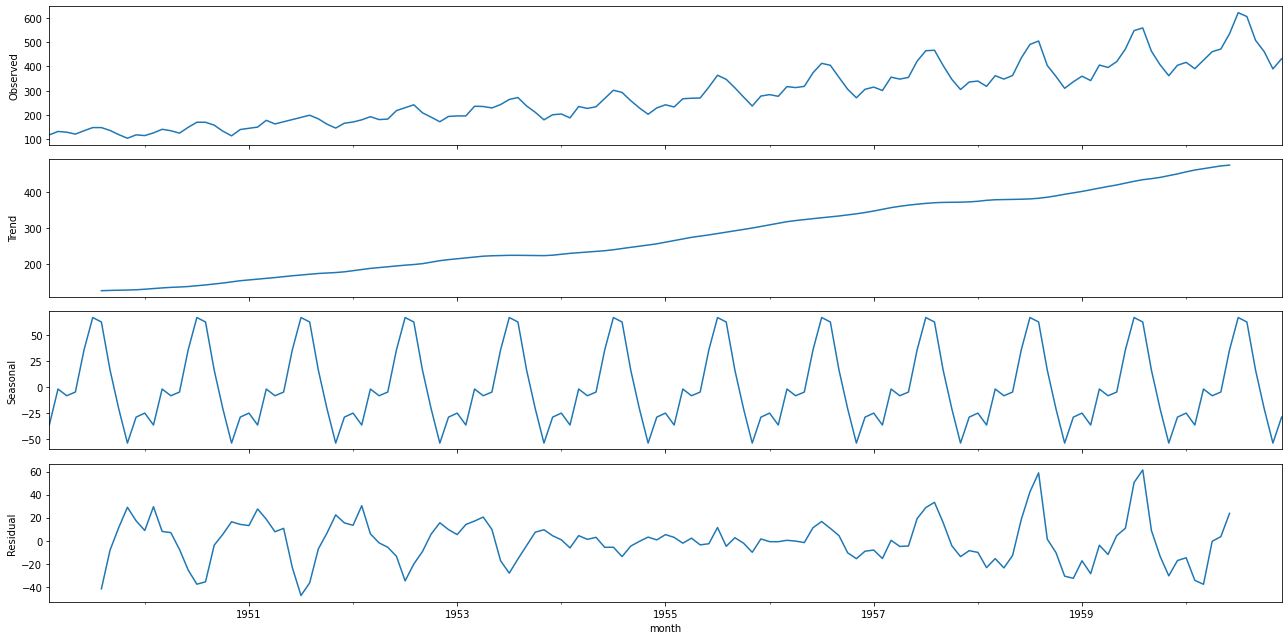

In [13]:
### Time Series Decomposition
#additive seasonal decomposition
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18,9
decomposition = sm.tsa.seasonal_decompose(data.passengers,model='additive')
fig = decomposition.plot()
plt.show()


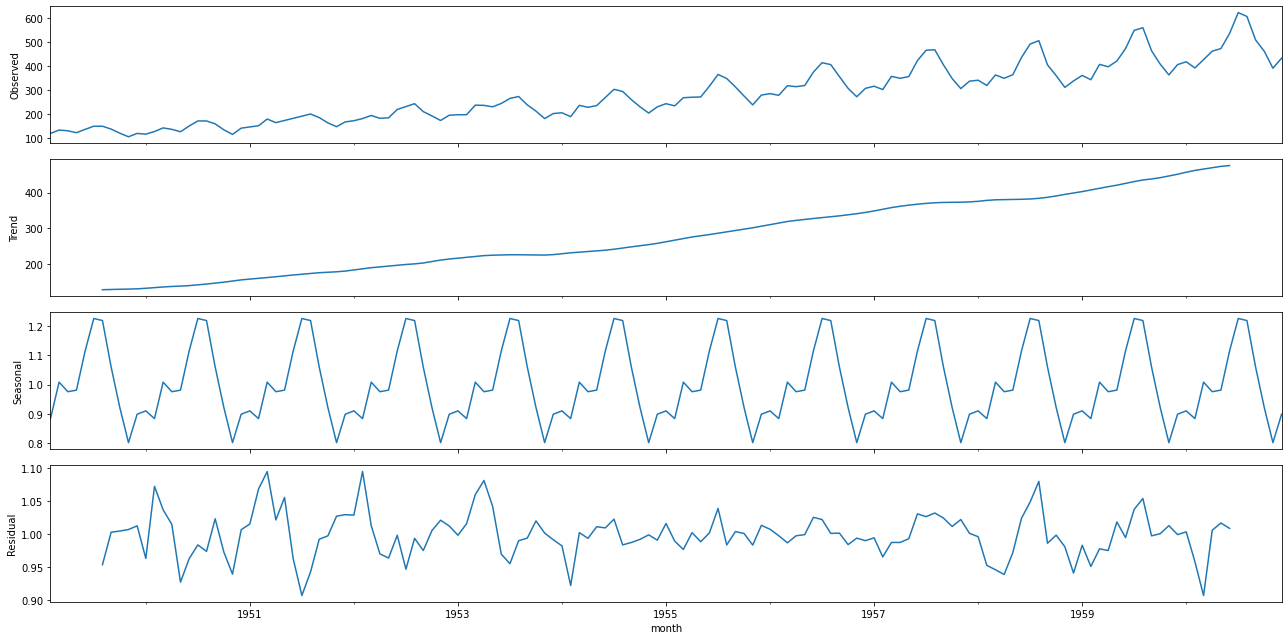

In [14]:
rcParams['figure.figsize'] = 18,9
decomposition = sm.tsa.seasonal_decompose(data.passengers,model='multiplicative')
fig = decomposition.plot()
plt.show()

# Training models


In [15]:
train_len = 120 
train_data = data[0:train_len]
test = data[train_len:]

***Naive Method***

In [16]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train_data['passengers'][train_len-1]


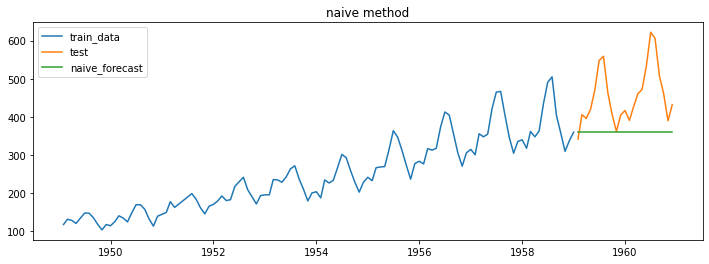

In [17]:
plt.figure(figsize = (12,4))
plt.plot(train_data['passengers'],label ='train_data' )
plt.plot(test['passengers'],label ='test' )
plt.plot(y_hat_naive['naive_forecast'],label ='naive_forecast' )
plt.legend(loc='best')
plt.title('naive method')
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['passengers'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['passengers']-y_hat_naive['naive_forecast'])/test['passengers'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,121.4,19.68


In [19]:

print(rmse)
print(mape)

121.4
19.68


***Avg Forcast***

In [20]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train_data['passengers'].mean()

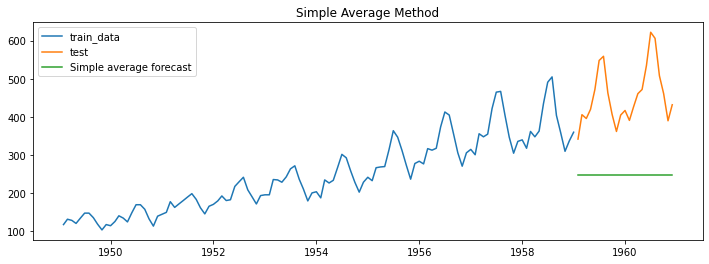

In [21]:
plt.figure(figsize=(12,4))
plt.plot(train_data['passengers'], label='train_data')
plt.plot(test['passengers'], label='test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [22]:
rmse = np.sqrt(mean_squared_error(test['passengers'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['passengers']-y_hat_avg['avg_forecast'])/test['passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,121.4,19.68
0,Simple average method,221.2,44.36


***Simple Moving Average Method***

In [23]:
y_hat_sma = data.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = data['passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

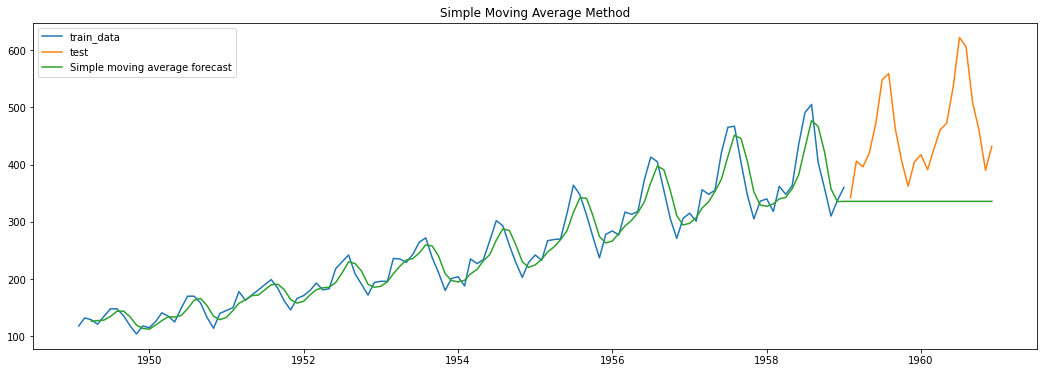

In [24]:
plt.figure(figsize=(18,6))
plt.plot(train_data['passengers'], label='train_data')
plt.plot(test['passengers'], label='test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [25]:
rmse = np.sqrt(mean_squared_error(test['passengers'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['passengers']-y_hat_sma['sma_forecast'][train_len:])/test['passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,121.40,19.68
0,Simple average method,221.20,44.36
0,Simple moving average forecast,141.52,24.68


***Simple Exponential Smoothing Method***

In [26]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train_data['passengers'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


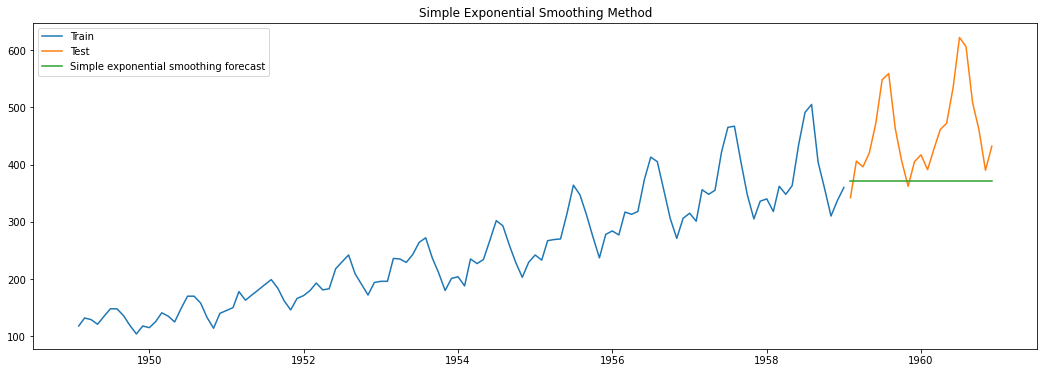

In [27]:
plt.figure(figsize=(18,6))
plt.plot(train_data['passengers'], label='Train')
plt.plot(test['passengers'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [28]:
rmse = np.sqrt(mean_squared_error(test['passengers'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['passengers']-y_hat_ses['ses_forecast'])/test['passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,121.40,19.68
0,Simple average method,221.20,44.36
0,Simple moving average forecast,141.52,24.68
0,Simple exponential smoothing forecast,112.15,17.55


***Holt\'s exponential smoothing method***

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train_data['passengers']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 118.0, 'initial_slope': 14.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


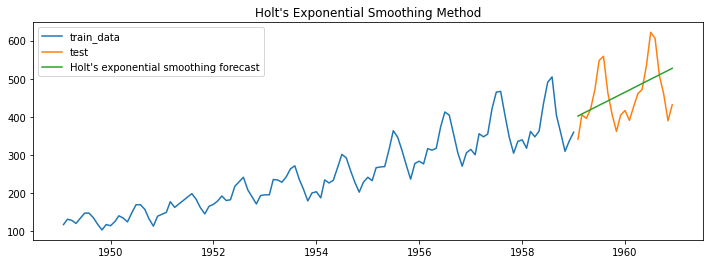

In [30]:
plt.figure(figsize=(12,4))
plt.plot( train_data['passengers'], label='train_data')
plt.plot(test['passengers'], label='test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [31]:
rmse = np.sqrt(mean_squared_error(test['passengers'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['passengers']-y_hat_holt['holt_forecast'])/test['passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,121.40,19.68
0,Simple average method,221.20,44.36
0,Simple moving average forecast,141.52,24.68
0,Simple exponential smoothing forecast,112.15,17.55
0,Holt's exponential smoothing method,71.27,12.75


***Holt Winters\' Additive Method***

In [32]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train_data['passengers']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(23)

{'smoothing_level': 0.2631578925350555, 'smoothing_slope': 0.050534814398665674, 'smoothing_seasonal': 0.7368421030613712, 'damping_slope': nan, 'initial_level': 206.84464215928838, 'initial_slope': 2.0943208438897747, 'initial_seasons': array([ -90.22523269,  -76.406035  ,  -79.66930346,  -87.75805964,
        -73.74482738,  -60.81774253,  -61.01332787,  -73.21637721,
        -90.37116428, -105.25649431,  -90.91910777,  -93.85787412]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


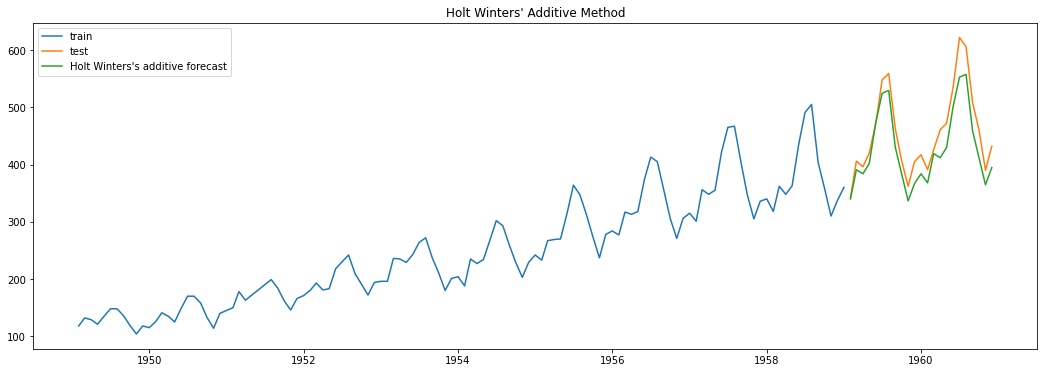

In [33]:
plt.figure(figsize=(18,6))
plt.plot( train_data['passengers'], label='train')
plt.plot(test['passengers'], label='test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [34]:
rmse = np.sqrt(mean_squared_error(test['passengers'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['passengers']-y_hat_hwa['hw_forecast'])/test['passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,121.40,19.68
0,Simple average method,221.20,44.36
0,Simple moving average forecast,141.52,24.68
0,Simple exponential smoothing forecast,112.15,17.55
0,Holt's exponential smoothing method,71.27,12.75
0,Holt Winters' additive method,34.13,6.37


***Holt Winters\' Mulitplicative Method***

In [35]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train_data['passengers']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(23)

{'smoothing_level': 0.3157894736526667, 'smoothing_slope': 0.05263126447168534, 'smoothing_seasonal': 0.6842105262842456, 'damping_slope': nan, 'initial_level': 208.69981154945813, 'initial_slope': 1.271244348561395, 'initial_seasons': array([0.58965376, 0.64430462, 0.61485636, 0.56784817, 0.63010543,
       0.69306308, 0.69284049, 0.63396818, 0.55133878, 0.48738474,
       0.56998034, 0.56536063]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


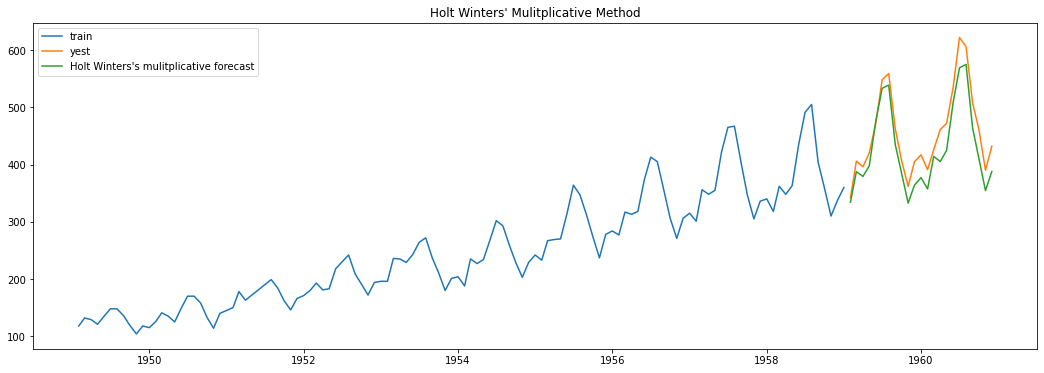

In [36]:
plt.figure(figsize=(18,6))
plt.plot( train_data['passengers'], label='train')
plt.plot(test['passengers'], label='yest')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [37]:
rmse = np.sqrt(mean_squared_error(test['passengers'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['passengers']-y_hat_hwm['hw_forecast'])/test['passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,121.40,19.68
0,Simple average method,221.20,44.36
0,Simple moving average forecast,141.52,24.68
0,Simple exponential smoothing forecast,112.15,17.55
0,Holt's exponential smoothing method,71.27,12.75
0,Holt Winters' additive method,34.13,6.37
0,Holt Winters' multiplicative method,33.63,6.69


***Auto Regressive methods***

Time series stationary or not?

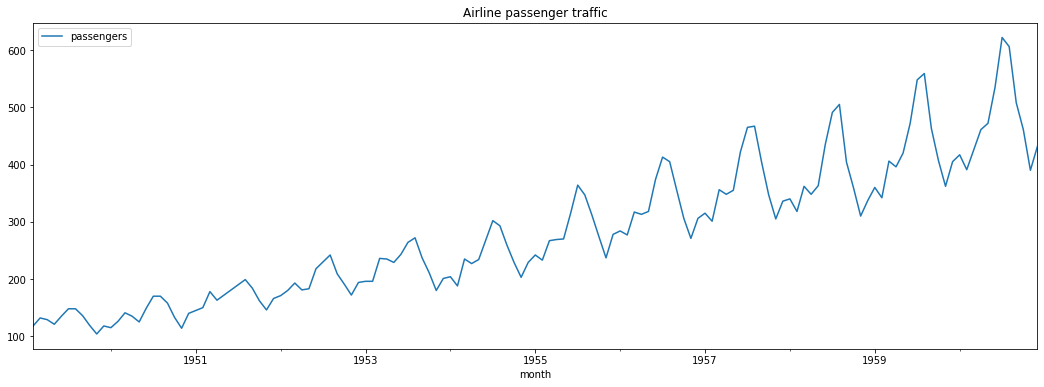

In [38]:
data['passengers'].plot(figsize=(18, 6))
plt.legend(loc='best')
plt.title('Airline passenger traffic')
plt.show(block=False)

In [39]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['passengers'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: 0.866288
Critical Values @ 0.05: -2.88
p-value: 0.992634


In [40]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['passengers'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 1.044840
Critical Values @ 0.05: 0.46
p-value: 0.010000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


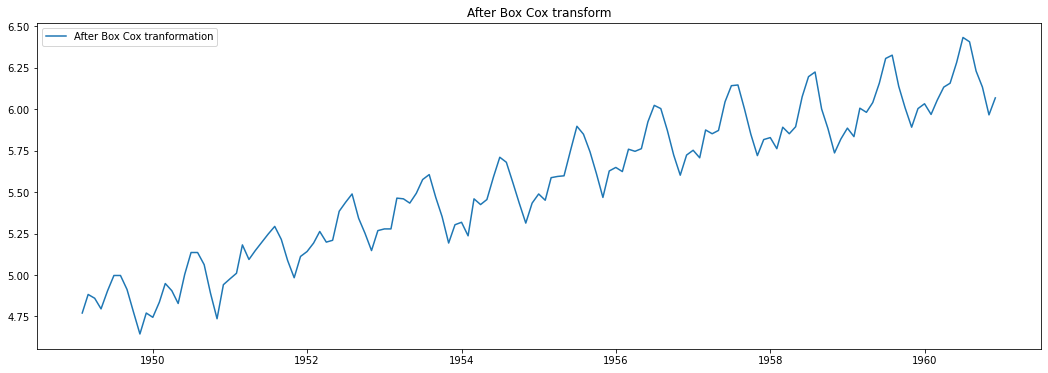

In [41]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['passengers'], lmbda=0), index = data.index)

plt.figure(figsize=(18,6))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

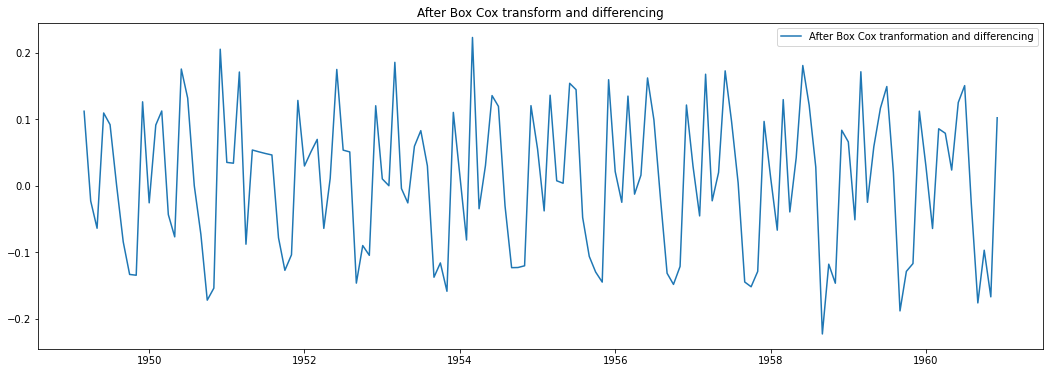

In [42]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data.index)
plt.figure(figsize=(18,6))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [43]:
data_boxcox_diff.dropna(inplace=True)

In [44]:
data_boxcox_diff.tail()

month
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
dtype: float64

Augmented Dickey-Fuller_ADF_test

In [45]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.267370
Critical Values @ 0.05: -2.88
p-value: 0.016402


Kwiatkowski-Phillips-Schmidt-Shin_KPSS_test

In [46]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.090523
Critical Values @ 0.05: 0.46
p-value: 0.100000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


non stasionary to statonary

### Box Cox transformation
making variance constant

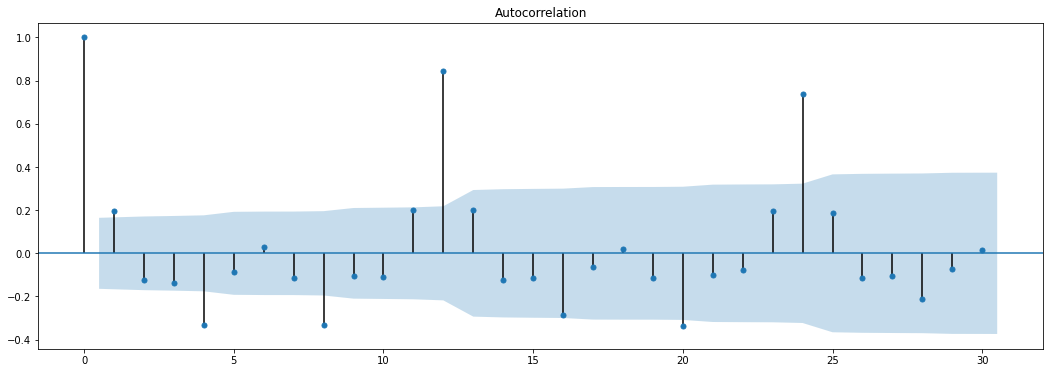

In [47]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(18,6))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

Differencing to remove trend


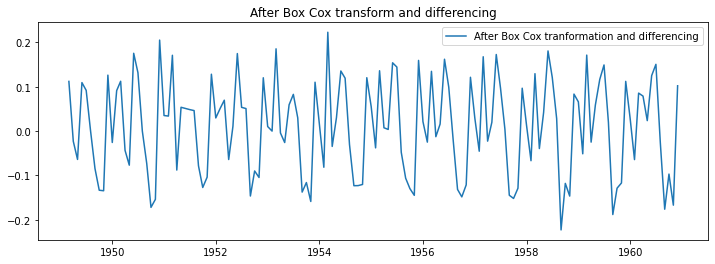

In [48]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [49]:

data_boxcox_diff.dropna(inplace=True)

In [50]:
data_boxcox_diff.tail()

month
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
dtype: float64

ADF test

In [51]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.267370
Critical Values @ 0.05: -2.88
p-value: 0.016402


KPSS test

In [52]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.090523
Critical Values @ 0.05: 0.46
p-value: 0.100000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


Autocorrelation function

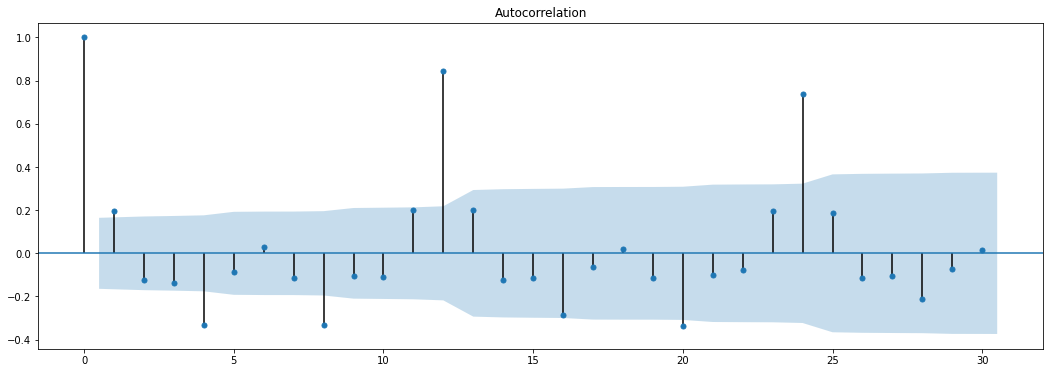

In [53]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(18,6))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

Partial autocorrelation function

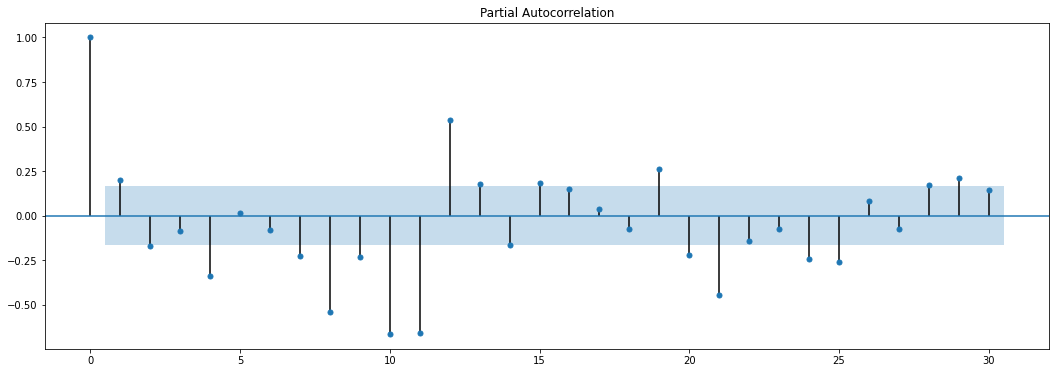

In [56]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(18,6))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

In [57]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [58]:
train_data_boxcox_diff

month
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
1949-07-01    0.091937
                ...   
1958-09-01   -0.223144
1958-10-01   -0.118092
1958-11-01   -0.146750
1958-12-01    0.083511
1959-01-01    0.066021
Length: 119, dtype: float64

Auto regression method (AR)

In [59]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.009674
ar.L1.y    0.183689
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Recover original time series

In [60]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

test and forecast

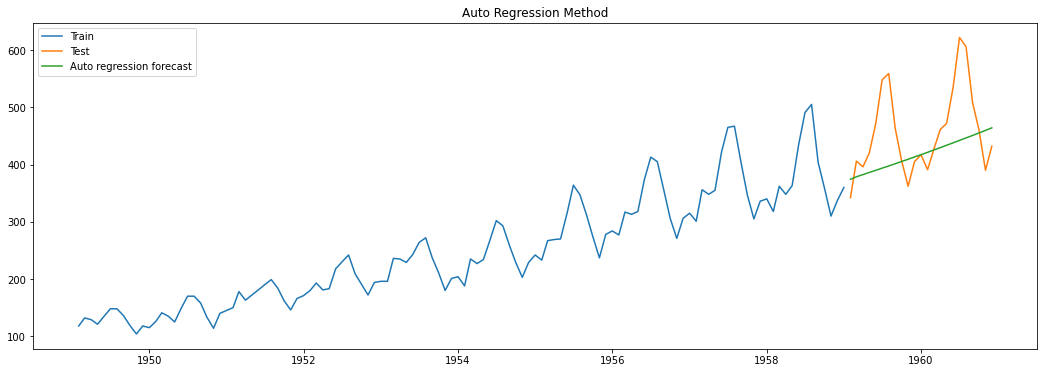

In [63]:
plt.figure(figsize=(18,6))
plt.plot(train_data['passengers'], label='Train')
plt.plot(test['passengers'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [64]:
rmse = np.sqrt(mean_squared_error(test['passengers'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['passengers']-y_hat_ar['ar_forecast'][test.index.min():])/test['passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,121.40,19.68
0,Simple average method,221.20,44.36
0,Simple moving average forecast,141.52,24.68
0,Simple exponential smoothing forecast,112.15,17.55
0,Holt's exponential smoothing method,71.27,12.75
0,Holt Winters' additive method,34.13,6.37
0,Holt Winters' multiplicative method,33.63,6.69
0,Autoregressive (AR) method,79.56,11.52


Moving average method

In [65]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.009669
ma.L1.y    0.268926
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Recover original time series

In [66]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

test and forcast

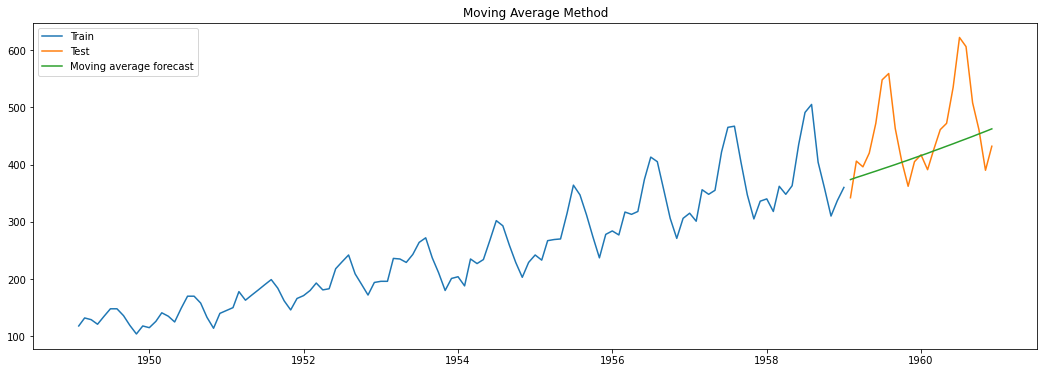

In [70]:
plt.figure(figsize=(18,6))
plt.plot(data['passengers'][:train_len], label='Train')
plt.plot(data['passengers'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

*RMSE and MAPE*

In [71]:
rmse = np.sqrt(mean_squared_error(test['passengers'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['passengers']-y_hat_ma['ma_forecast'][test.index.min():])/test['passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,121.40,19.68
0,Simple average method,221.20,44.36
0,Simple moving average forecast,141.52,24.68
0,Simple exponential smoothing forecast,112.15,17.55
0,Holt's exponential smoothing method,71.27,12.75
0,Holt Winters' additive method,34.13,6.37
0,Holt Winters' multiplicative method,33.63,6.69
0,Autoregressive (AR) method,79.56,11.52
0,Moving Average (MA) method,80.33,11.66


Auto regression moving average method

In [72]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.009224
ar.L1.y   -0.534431
ma.L1.y    0.803362
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Recover original time series

In [73]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

test and forecast

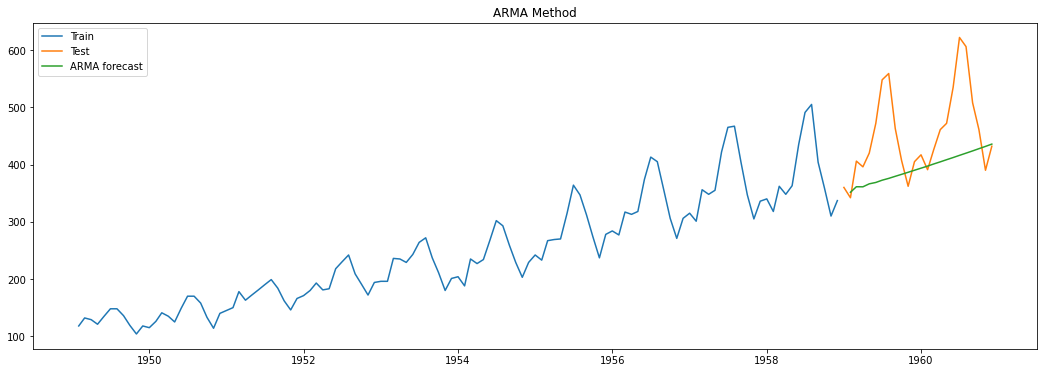

In [76]:
plt.figure(figsize=(18,6))
plt.plot( data['passengers'][:train_len-1], label='Train')
plt.plot(data['passengers'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

RMSE and MAPE

In [78]:
rmse = np.sqrt(mean_squared_error(test['passengers'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['passengers']-y_hat_arma['arma_forecast'][train_len-1:])/test['passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,121.40,19.68
0,Simple average method,221.20,44.36
0,Simple moving average forecast,141.52,24.68
0,Simple exponential smoothing forecast,112.15,17.55
0,Holt's exponential smoothing method,71.27,12.75
0,Holt Winters' additive method,34.13,6.37
0,Holt Winters' multiplicative method,33.63,6.69
0,Autoregressive (AR) method,79.56,11.52
0,Moving Average (MA) method,80.33,11.66
0,Autoregressive moving average (ARMA) method,93.26,13.80


Auto regressive integrated moving average

In [79]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const        0.009224
ar.L1.D.y   -0.534431
ma.L1.D.y    0.803362
dtype: float64


In [80]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

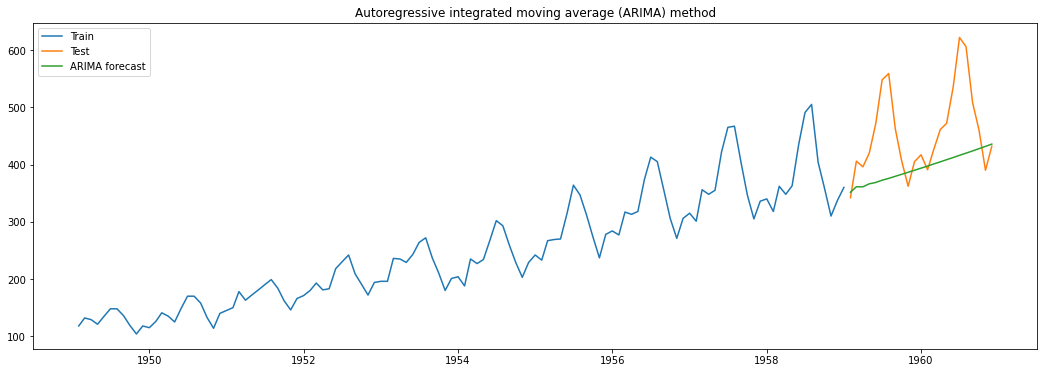

In [82]:
plt.figure(figsize=(18,6))
plt.plot(train_data['passengers'], label='Train')
plt.plot(test['passengers'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [83]:
rmse = np.sqrt(mean_squared_error(test['passengers'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['passengers']-y_hat_arima['arima_forecast'][test.index.min():])/test['passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,121.40,19.68
0,Simple average method,221.20,44.36
0,Simple moving average forecast,141.52,24.68
0,Simple exponential smoothing forecast,112.15,17.55
0,Holt's exponential smoothing method,71.27,12.75
0,Holt Winters' additive method,34.13,6.37
0,Holt Winters' multiplicative method,33.63,6.69
0,Autoregressive (AR) method,79.56,11.52
0,Moving Average (MA) method,80.33,11.66
0,Autoregressive moving average (ARMA) method,93.26,13.80


Seasonal auto regressive integrated moving average (SARIMA)


In [84]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ar.L1       0.389252
ma.L1      -0.689650
ar.S.L12   -0.050075
ma.S.L12   -0.509358
sigma2      0.001414
dtype: float64


In [85]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

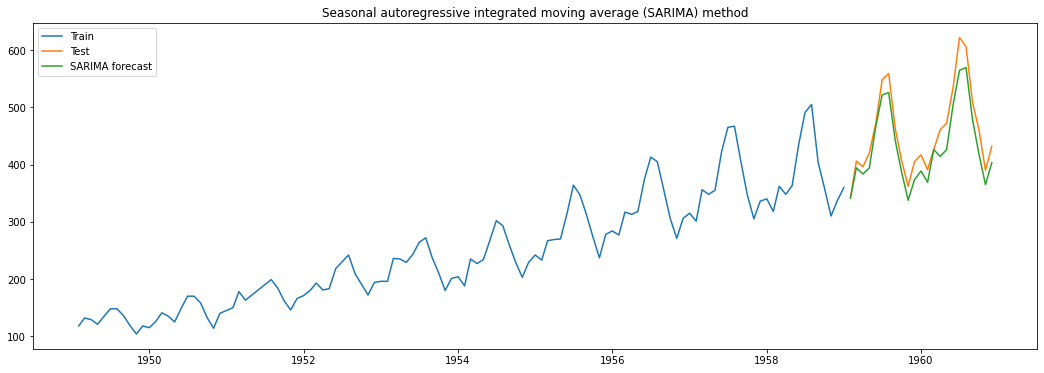

In [87]:
plt.figure(figsize=(18,6))
plt.plot(train_data['passengers'], label='Train')
plt.plot(test['passengers'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [88]:
rmse = np.sqrt(mean_squared_error(test['passengers'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['passengers']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,121.40,19.68
0,Simple average method,221.20,44.36
0,Simple moving average forecast,141.52,24.68
0,Simple exponential smoothing forecast,112.15,17.55
0,Holt's exponential smoothing method,71.27,12.75
0,Holt Winters' additive method,34.13,6.37
0,Holt Winters' multiplicative method,33.63,6.69
0,Autoregressive (AR) method,79.56,11.52
0,Moving Average (MA) method,80.33,11.66
0,Autoregressive moving average (ARMA) method,93.26,13.80


Seasonal auto regressive integrate moving average with exogenous variable

In [89]:
promo = pd.read_csv('promotion.csv', header = None)
promo.columns = ['Month','Event']
promo['Month'] = pd.to_datetime(promo['Month'], format='%Y-%m')
promo = promo.set_index('Month')
promo

FileNotFoundError: ignored